In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

#training data 불러오기 
data = np.loadtxt("train.dat")

#training data 사이즈 확인 
data.shape

(296, 3)

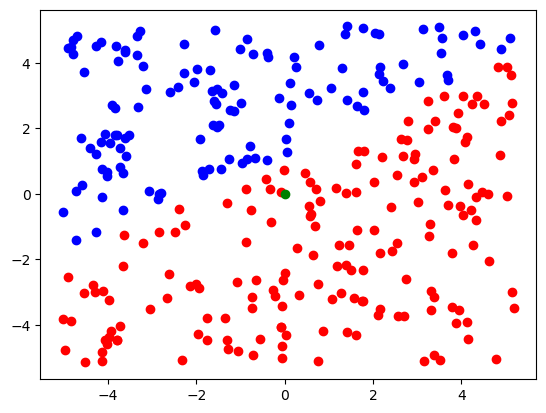

In [15]:
data[:, :]
train_data = data[:, :2]    #입력값 
train_label = data[:, 2:3]  #기댓값 Desired value 

# training data를 기댓값에 맞게 구별해서 분포 확인 
for i in range(1, 297):
    if train_label[i-1:i, :] == 1:
        plt.plot(train_data[i-1:i, 0:1], train_data[i-1:i, 1:2], 'ro')
    else:
        plt.plot(train_data[i-1:i, 0:1], train_data[i-1:i, 1:2], 'bo')

#그래프 원점 확인 
plt.plot([0], [0], 'go') 

In [59]:
#w0 random weight vector 
w = np.array([[1,1]])

# weight vector training 시작 
for i in range(1,297):
    d = train_label[i-1:i, :]
    x = train_data[i-1:i, :]
    if x.dot(w.T) > 0: y=1
    else: y = -1 
    r = d[0][0] - y 
    n = 0.007
    if r != 0:
        vw = n*r*x 
        w = w + vw

# training 된 weight vector 확인         
print(w)

[[ 0.1438034 -0.2713568]]


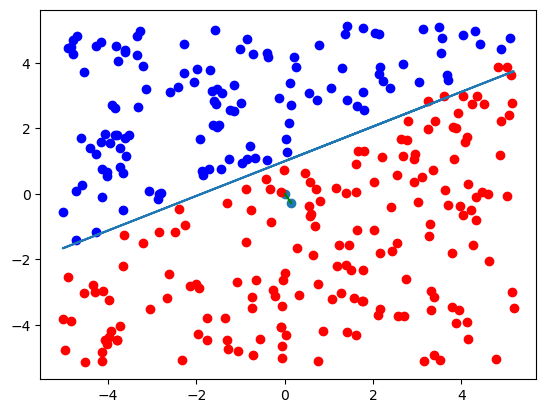

In [60]:
#Training data 분포 다시 확인 
for i in range(1, 297): 
    if train_label[i-1:i, :] == 1:
        plt.plot(train_data[i-1:i, 0:1], train_data[i-1:i, 1:2], 'ro')
    else:
        plt.plot(train_data[i-1:i, 0:1], train_data[i-1:i, 1:2], 'bo')

#Linearly Seperable 하는 직선의 방정식 그리기 
gr = -(w[0][0]/w[0][1]) #기울기 
plt.plot(train_data[:, 0:1], gr*train_data[:, 0:1]+1)

#Weight vector 그리기 
wxx = [0, w[0][0]]
wyy = [0, w[0][1]]
plt.scatter(wxx, wyy)
plt.plot(wxx, wyy, 'g')

#그래프 이미지의 비율이 정사각형이 아니라서 그래프 상에는 수직으로 보이지 않습니다. 

In [69]:
# test data 생성 
td = np.random.random((1, 2))
td

array([[0.94199461, 0.79335231]])

In [70]:
# test data 확인 
a = gr*td[0][0]+1 
if td[0][1] > a: 
    print(-1)
else:
    print(1)

1


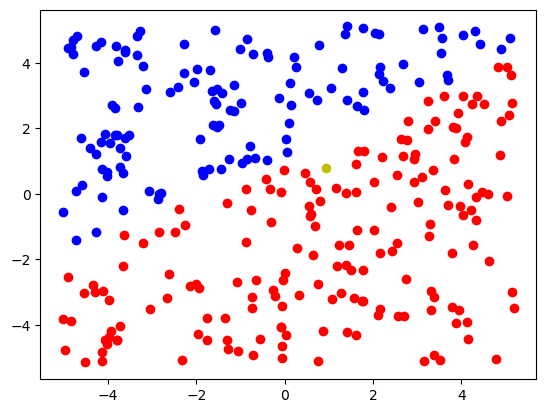

In [71]:
#Test data가 해당 class에 있는지 그래프로 확인 
for i in range(1, 297): 
    if train_label[i-1:i, :] == 1:
        plt.plot(train_data[i-1:i, 0:1], train_data[i-1:i, 1:2], 'ro')
    else:
        plt.plot(train_data[i-1:i, 0:1], train_data[i-1:i, 1:2], 'bo')
        
plt.plot(td[0][0], td[0][1], 'yo') 